# ML4Cyber
# Lab - Intro to ML - Classification - Titanic Datasets

## Problem Framing

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive the sinking. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


#### Data Description
1. `survived` -  Survival (0 = No; 1 = Yes)
2. `class` - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. `name` - Name
4. `sex` -  Sex
5. `age` - Age
6. `sibsp` - Number of Siblings/Spouses Aboard
   - Sibling = brother, sister, stepbrother, stepsister
   - Spouse = husband, wife (mistresses and fiancés were ignored)
7. `parch` - Number of Parents/Children Aboard
   - Parent = mother, father
   - Child = daughter, son, stepdaughter, stepson
   - Some children travelled only with a nanny, therefore parch=0 for them.
8. `ticket` - Ticket Number
9. `fare`  -  Passenger Fare
10. `cabin` - Cabin
11. `embarked` - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
12. `boat` - Lifeboat (if survived)
13. `body` - Body number (if did not survive and body was recovered)


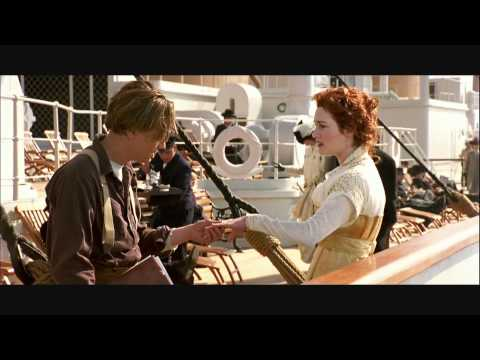

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ad9Y38ZASPg')

## Dataset Building - Data Preperation & EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings('ignore')

## Reflection

Reflect about your work and write it here: What did you learn? How do you feel? What can you do better for next time?

## Further Steps

1. Plot the feature importance of different models (especially for trees models). Check out [this](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#example-ensemble-plot-forest-importances-py) code examole.

2. Plot the learning curve of the train and test accuracy scores of different models, **as function of the training dataset size**. Make sure that for a given training dataset size, you train the model with the same sub-dataset.

In [3]:
df = pd.read_excel("titanic.xls")

In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Data Cleaning
<hr>

In [5]:
df.isnull().mean(axis=0)

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

We can see that some values are null, namely
1. age
2. fare
3. cabin
4. embarked
5. boat
6. body
7. homedest

Since fare and embarked null values are relatively insignificant, we remove them from the df

In [6]:
df = df[df['fare'].isnull() != True]
df = df[df['embarked'].isnull() != True]

## Dropping useless columns

homedest, Body and Boat isnt useful features to tell us if someone survived, so we can drop that column

In [7]:
df = df.drop(['body', 'boat', 'home.dest'], axis=1)

In [8]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


## Replacing Missing Ages

In [9]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1306.000000,1306.000000,1043.000000,1306.00000,1306.000000,1306.000000
mean,2.296325,0.381317,29.813199,0.50000,0.385911,33.223956
std,0.837037,0.485896,14.366261,1.04258,0.866357,51.765986
min,1.000000,0.000000,0.166700,0.00000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.00000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.00000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.00000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.00000,9.000000,512.329200


We can replace missing ages with the 50% age (median), which is 28

In [10]:
df['age'] = df['age'].fillna(28)

# Outlier detection
<hr>

In [11]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1306.000000,1306.000000,1306.000000,1306.00000,1306.000000,1306.000000
mean,2.296325,0.381317,29.448060,0.50000,0.385911,33.223956
std,0.837037,0.485896,12.857854,1.04258,0.866357,51.765986
min,1.000000,0.000000,0.166700,0.00000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.00000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.00000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.00000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.00000,9.000000,512.329200


Looking at age, we have a minimum age of 0.1667, which doesnt make sense (unless you're a few months old), and we can remove it 

In [12]:
df_clean = df[df['age']>=1]

In [13]:
df_clean.describe()

,pclass,survived,age,sibsp,parch,fare
count,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000
mean,2.294436,0.377125,29.714838,0.496909,0.376352,33.264145
std,0.838378,0.484854,12.613745,1.044815,0.863327,51.878531
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [14]:
df_clean = df[df['fare']<500]

In [15]:
df_clean.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


Looks pretty good! Before we do visualization, we need to convert them into numerical values

# Data Massaging
<hr>

## Getting Cabin Alphabet

Looking at the cabin, I want to normalize them to display only the cabin alphabet, and not the number. i.e C55 = C

In [16]:
df_clean['cabin'] = df_clean['cabin'].fillna('X')
df_clean['cabinClass'] = df_clean['cabin'].apply(lambda x : str(x)[0])

In [17]:
df_clean.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabinClass
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,B
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,C
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,C
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,C
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,C


## Getting Cabin Number

In [18]:
def GetCabinNumber(cabin):
    number = 0
    numberList = list(map(int,re.findall('\d+',cabin.split(" ")[0])))
    
    if (len(numberList) > 0):
        number =  numberList[0]
    
    return number

In [19]:
df_clean['cabinNumber'] = df_clean['cabin'].apply(lambda x : GetCabinNumber(x) )

# Encoding non numeric values
<hr>

In [20]:
def Dummize(df):
    sex = pd.get_dummies(df['sex'], drop_first=True)
    df = pd.concat([df,sex], axis=1)
    return df

In [21]:
df_clean['embarked'] = df_clean['embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [22]:
df_clean = Dummize(df_clean)

In [23]:
df_clean.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabinClass,cabinNumber,male
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,0,B,5,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,0,C,22,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,0,C,22,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,0,C,22,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,0,C,22,0


# Bivariate Analysis
<hr>

## Age vs Survived

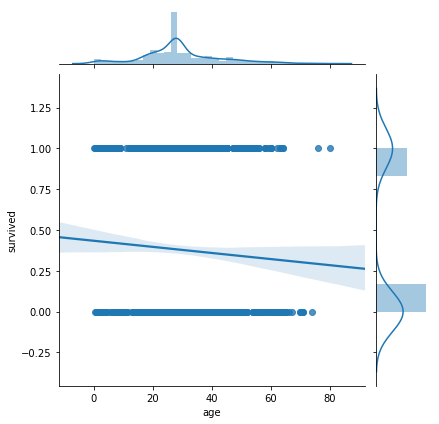

In [24]:
sns.jointplot(x="age", y="survived", data=df_clean, kind='reg')

We can see that the graph is slightly tilted as you get older, meaning to say, the older you are, the lower chance of surviving. This is true, as when the Titanic was sinking, the young and the ladies were given priority to evacuate first

## Sex vs Surviving

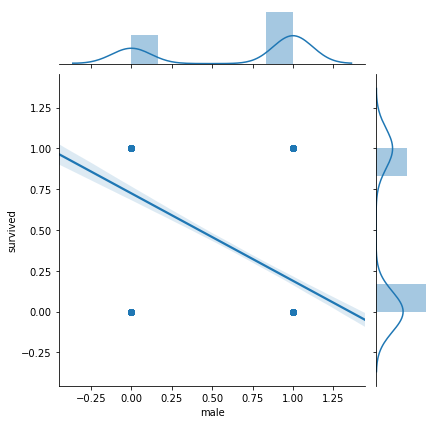

In [25]:
sns.jointplot(x="male", y="survived", data=df_clean, kind='reg')

Here we can see the graph tiliting the other way. On the X-axis, a female=0 indicates a male, and a female=1 indicates a female.

It tells us that if you're a female, your chances of surviving are higher. And since the line is heavily tilted, the correlation is stronger

## Parent Child vs Surviving

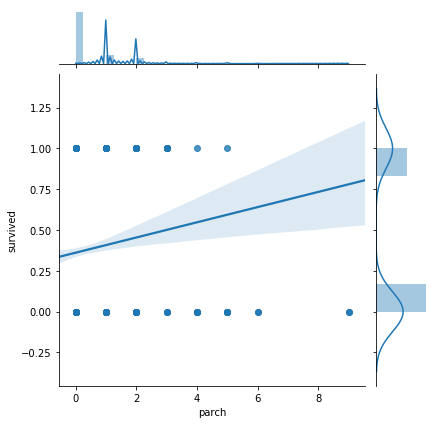

In [26]:
sns.jointplot(x="parch", y="survived", data=df_clean, kind='reg')

The graph tilts again, meaning to say that the more family members are on board, the higher chance one of the members will survive

## Sibiling vs Survivng

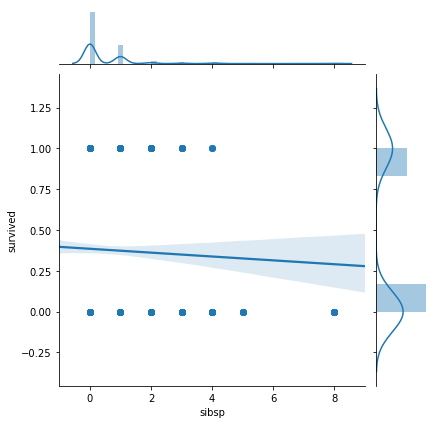

In [27]:
sns.jointplot(x="sibsp", y="survived", data=df_clean, kind='reg')

Surprisingly, the more siblings you have, the more likely you'll die???

## Passenger Class vs Surviving

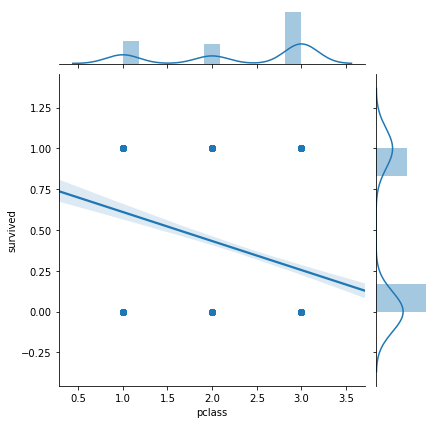

In [28]:
sns.jointplot(x="pclass", y="survived", data=df_clean, kind='reg')

This is a really strong feature, where the higher your class ticket, the more likely you've survive. Possibly because you were given priority. 

## Fare vs Survivng

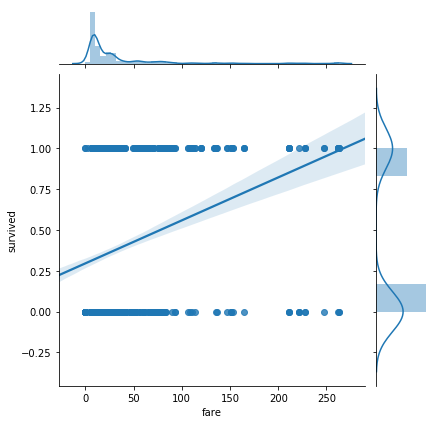

In [29]:
sns.jointplot(x="fare", y="survived", data=df_clean, kind='reg')

The higher the fare, the more likely you would survive. This could be due to paying more for a higher class

## Fare vs Class

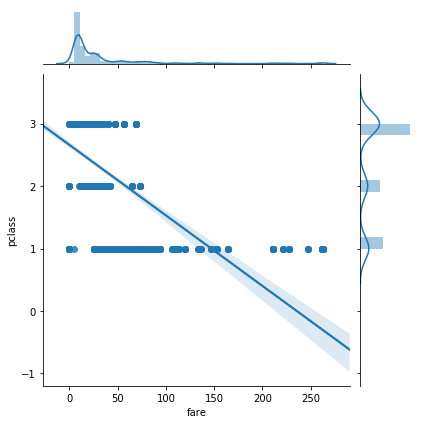

In [30]:
sns.jointplot(x="fare", y="pclass", data=df_clean, kind='reg')

# Univariate Analysis
<hr>

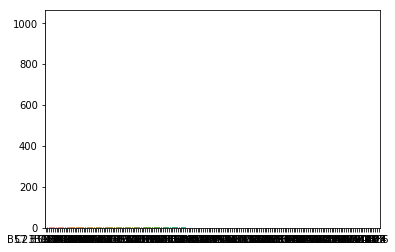

In [31]:
cabin = df_clean['cabin'].value_counts()
sns.barplot(x=cabin.index, y=cabin.values)

## Excluding the unknown cabin

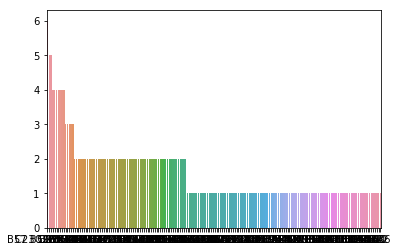

In [32]:
cabin = df_clean[df_clean['cabin'] != 'X']['cabin'].value_counts()
sns.barplot(x=cabin.index, y=cabin.values)

## Visualizing Age

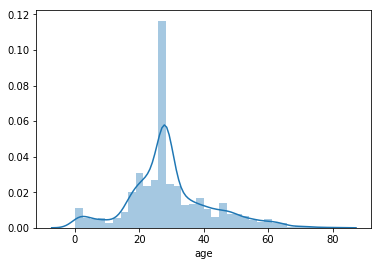

In [33]:
sns.distplot(df_clean['age'])

## Visualizing Fare

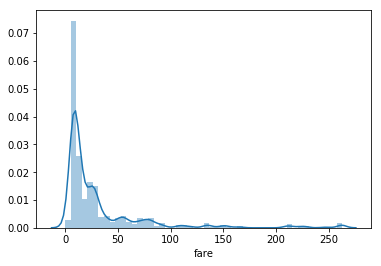

In [34]:
sns.distplot(df_clean['fare'])

# Training the Model
<hr>

# Generating new features

## Binning the age

In [35]:
df_clean['AgeBand'] = pd.cut(df_clean['age'], 5)
df_clean[['AgeBand', 'survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,survived
0,"(0.0869, 16.133]",0.552239
1,"(16.133, 32.1]",0.343075
2,"(32.1, 48.067]",0.388679
3,"(48.067, 64.033]",0.436893
4,"(64.033, 80.0]",0.153846


In [36]:
def BinAge(df):  
    df.loc[ df['age'] <= 16, 'age'] = 0
    df.loc[(df['age'] > 16) & (df['age'] <= 32), 'age'] = 1
    df.loc[(df['age'] > 32) & (df['age'] <= 48), 'age'] = 2
    df.loc[(df['age'] > 48) & (df['age'] <= 64), 'age'] = 3
    df.loc[ df['age'] > 64, 'age']
    
    return df

df_clean = BinAge(df_clean)

## Binning the fares

In [55]:
def BinFare(df):
    df.loc[ df['fare'] <= 7.91, 'fare'] = 0
    df.loc[(df['fare'] > 7.91) & (df['fare'] <= 14.454), 'fare'] = 1
    df.loc[(df['fare'] > 14.454) & (df['fare'] <= 31), 'fare']   = 2
    df.loc[ df['fare'] > 31, 'fare'] = 3
    df['fare'] = df['fare'].astype(int)
    
    return df

df_clean = BinFare(df_clean)

In [56]:
df_clean.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabinClass,cabinNumber,male,AgeBand,FamilySize,IsAlone,ageClass,Fare
0,1,1,"Allen, Miss. Elisabeth Walton",female,1.0,0,0,24160,3,B5,0,B,5,0,"(16.133, 32.1]",1,1,1.0,3.0
1,1,1,"Allison, Master. Hudson Trevor",male,0.0,1,2,113781,3,C22 C26,0,C,22,1,"(0.0869, 16.133]",4,0,0.0,3.0
2,1,0,"Allison, Miss. Helen Loraine",female,0.0,1,2,113781,3,C22 C26,0,C,22,0,"(0.0869, 16.133]",4,0,0.0,3.0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,1.0,1,2,113781,3,C22 C26,0,C,22,1,"(16.133, 32.1]",4,0,1.0,3.0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1.0,1,2,113781,3,C22 C26,0,C,22,0,"(16.133, 32.1]",4,0,1.0,3.0


## Finding Size of Family

In [57]:
df_clean['FamilySize'] = df_clean['sibsp'] + df_clean['parch'] + 1

In [58]:
df_clean['IsAlone'] = 0
df_clean.loc[df_clean['FamilySize'] == 1, 'IsAlone'] = 1

## Generate features with age and pclass

In [59]:
df_clean['ageClass'] = df_clean['age'] * df_clean['pclass']

# Picking out features

In [84]:
df_train = df_clean[['pclass','male','fare','age','cabinNumber', 'FamilySize', 'IsAlone']]

df_train.head()

,pclass,male,fare,age,cabinNumber,FamilySize,IsAlone
0,1,0,3,1.0,5,1,1
1,1,1,3,0.0,22,4,0
2,1,0,3,0.0,22,4,0
3,1,1,3,1.0,22,4,0
4,1,0,3,1.0,22,4,0


## Separating Feature and Labels

In [85]:
y = df_clean['survived']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

## Splitting the data

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.3, random_state=1)

## Feature Scaling

In [87]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mmscaler = MinMaxScaler()
sscaler = StandardScaler()

In [88]:
train_scaled = mmscaler.fit_transform(X_train)
test_scaled = mmscaler.transform(X_test)

Fitting and transformed on the training set

Only transform is done on test set

## Performing traing and prediciton

### KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=5)
sklearn_knn.fit(train_scaled, y_train)
sklearn_knn.score(test_scaled, y_test)

0.80306905370844

### Decision Tree

In [96]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8209718670076727

In [97]:
clf.feature_importances_

array([0.1396715 , 0.42731794, 0.01594011, 0.09268138, 0.19199727,
       0.11380546, 0.01858633])

### Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
clf = LogisticRegression(random_state=1, solver='lbfgs')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7902813299232737

### Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8184143222506394